In [1]:
import torch
import torch.optim as optim
from torchvision import transforms, models
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [2]:
vgg = models.vgg19(pretrained=True).features

for param in vgg.parameters():
    param.requires_grad_(False)

In [48]:
for i in vgg._modules.items():
    print(i)

('0', Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
('1', ReLU(inplace))
('2', Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
('3', ReLU(inplace))
('4', MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False))
('5', Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
('6', ReLU(inplace))
('7', Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
('8', ReLU(inplace))
('9', MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False))
('10', Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
('11', ReLU(inplace))
('12', Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
('13', ReLU(inplace))
('14', Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
('15', ReLU(inplace))
('16', Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)))
('17', ReLU(inplace))
('18', MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, c

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace)
  (18): MaxPool2d(kernel_size=2, stride=2, padding=0, 

In [83]:
def load_image(path, max_size=300, shape=None):
    image = Image.open(path).convert("RGB")
    if max(image.size) > max_size:
        size = max_size
    else:
        size = max(image.size)
    trans = transforms.Compose([
        transforms.Resize(size),
        transforms.ToTensor(),
        transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
    ])
    image = trans(image).unsqueeze(0)
    return image

In [84]:
content = load_image('Roses.jpg').to(device)
style = load_image('Colours.jpg').to(device)

torch.Size([1, 3, 300, 450])

In [70]:
def im_convert(tensor):
    image = tensor.to("cpu").clone().detach().numpy()
    image = image.squeeze()
    image = image.transpose(1,2,0)
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    image = image.clip(0, 1)
    return image

(-0.5, 532.5, 299.5, -0.5)

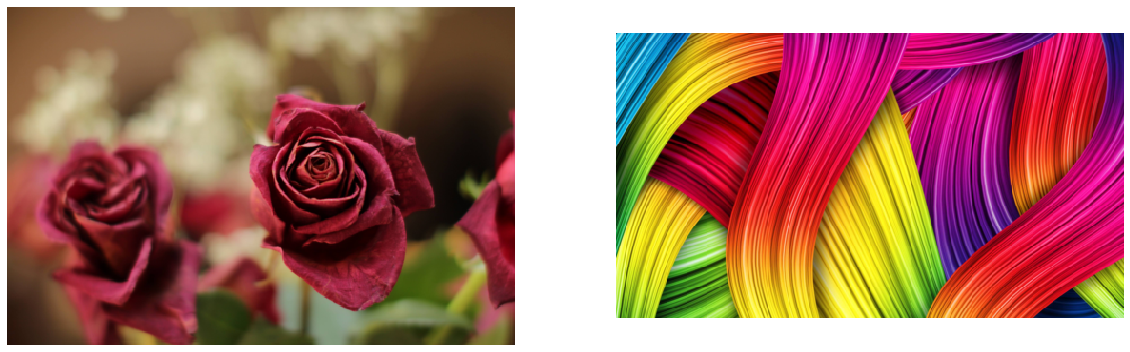

In [81]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))
ax1.imshow(im_convert(content))
ax1.axis("off")
ax2.imshow(im_convert(style))
ax2.axis("off")


In [85]:
print(content.size(),style.size())

torch.Size([1, 3, 300, 450]) torch.Size([1, 3, 300, 533])


In [26]:
temp = city.resize((300,300))

In [49]:
def get_features(image, model):
    
    layers = {'0': 'conv1_1',
              '5': 'conv2_1', 
              '10': 'conv3_1', 
              '19': 'conv4_1',
              '21': 'conv4_2',  # Content Extraction
              '28': 'conv5_1'}
    
    features = {}
    
    for name, layer in model._modules.items():
        image = layer(image)
        if name in layers:
            features[layers[name]] = image
    
    return features
        

In [86]:
content_features = get_features(content, vgg)
style_features = get_features(style, vgg)

In [51]:
def gram_matrix(tensor):
    _, d, h, w = tensor.size()
    tensor = tensor.view(d, h * w)
    gram = torch.mm(tensor, tensor.t())
    return gram

In [87]:
style_grams = {layer: gram_matrix(style_features[layer]) for layer in style_features}

In [53]:
style_weights = {'conv1_1': 1.,
                 'conv2_1': 0.75,
                 'conv3_1': 0.2,
                 'conv4_1': 0.2,
                 'conv5_1': 0.2}

content_weight = 1  # alpha
style_weight = 1e6  # beta

In [88]:
target = content.clone().requires_grad_(True).to(device)

In [89]:
temp = models.vgg19()

In [79]:
[target]

[tensor([[[[-0.6743, -0.4199, -0.6016,  ..., -1.0669, -1.0930, -1.0908],
           [-0.4949, -0.5846, -0.8581,  ..., -0.8387, -0.9964, -1.0679],
           [-0.5390, -0.5875, -0.8227,  ..., -0.7236, -0.8968, -0.9640],
           ...,
           [-1.0463, -0.8888, -0.7364,  ..., -0.6630, -0.6576, -0.6546],
           [-0.9657, -0.7056, -0.5733,  ..., -0.6313, -0.6740, -0.6896],
           [-0.8008, -0.6874, -0.6647,  ..., -0.4879, -0.5735, -0.8347]],
 
          [[-0.1619, -0.3819, -0.4922,  ..., -0.8053, -0.5710, -0.1943],
           [-0.4681, -0.4600, -0.6991,  ..., -0.6003, -0.6507, -0.3539],
           [-0.4917, -0.6208, -0.9200,  ..., -0.6533, -0.4314, -0.2827],
           ...,
           [-0.4809, -0.5906, -0.7179,  ..., -0.6477, -0.5277, -0.4850],
           [-0.3591, -0.3544, -0.3873,  ..., -0.5962, -0.4496, -0.3752],
           [-0.2445, -0.5278, -0.5982,  ..., -0.6969, -0.6082, -0.4995]],
 
          [[-0.2226, -0.4212, -0.4555,  ..., -0.3938, -0.3468, -0.2790],
           [-

In [90]:
show_every = 100
optimizer = optim.Adam([target], lr=0.003)
steps = 500

height, width, channels = im_convert(target).shape
image_array = np.empty(shape=(300, height, width, channels))
capture_frame = steps/300
counter = 0

***************
Total loss:  93246256.0
Iteration:  100


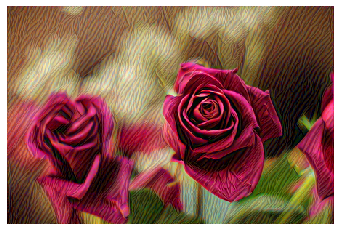

***************
Total loss:  53134660.0
Iteration:  200


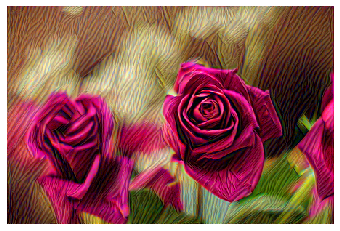

***************
Total loss:  30725488.0
Iteration:  300


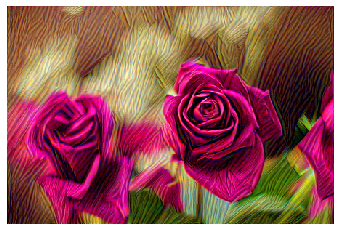

***************
Total loss:  20126874.0
Iteration:  400


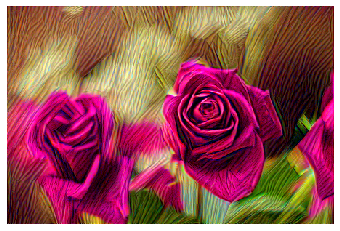

***************
Total loss:  15126471.0
Iteration:  500


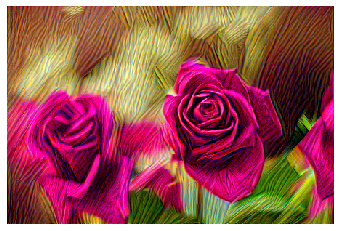

In [91]:
for ii in range(1, steps+1):
    target_features = get_features(target, vgg)
    content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2'])**2)
    style_loss = 0

    for layer in style_weights:
        target_feature = target_features[layer]
        target_gram = gram_matrix(target_feature)
        style_gram = style_grams[layer]
        layer_style_loss = style_weights[layer] * torch.mean((target_gram - style_gram)**2)
        _, d, h, w = target_feature.shape
        style_loss += layer_style_loss / (d * h * w)
  
    total_loss = content_weight * content_loss + style_weight * style_loss

    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()

    if  ii % show_every == 0:
        print("***************")
        print('Total loss: ', total_loss.item())
        print('Iteration: ', ii)
        plt.imshow(im_convert(target))
        plt.axis("off")
        plt.show()
    
    if ii % capture_frame == 0:
        image_array[counter] = im_convert(target)
        counter = counter + 1